In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df=pd.read_csv("/Users/shlokrakeshapte/Desktop/Project/taxi_tripdata.csv",low_memory=False)
print(df)

       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0           1.0     01/07/2021 00:30      01/07/2021 00:35                  N   
1           2.0     01/07/2021 00:25      01/07/2021 01:01                  N   
2           2.0     01/07/2021 00:05      01/07/2021 00:12                  N   
3           2.0     01/07/2021 00:41      01/07/2021 00:47                  N   
4           2.0     01/07/2021 00:51      01/07/2021 00:58                  N   
...         ...                  ...                   ...                ...   
83686       NaN     02/07/2021 07:59      02/07/2021 08:33                NaN   
83687       NaN     02/07/2021 07:02      02/07/2021 07:18                NaN   
83688       NaN     02/07/2021 07:53      02/07/2021 08:15                NaN   
83689       NaN     02/07/2021 07:58      02/07/2021 08:30                NaN   
83690       NaN     02/07/2021 07:00      02/07/2021 07:26                NaN   

       RatecodeID  PULocati

In [26]:
df.shape

(83691, 20)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [55]:
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
trip_duration            0
hour                     0
day_of_week              0
month                    0
year                     0
dtype: int64

In [52]:
df.drop(columns="ehail_fee",axis=1,inplace=True)

In [53]:
df.dropna(inplace=True)

In [54]:
df.shape

(19421, 24)

## Are there any outliers in trip_distance, fare_amount, or total_amount?

In [56]:
px.box(df,y="trip_distance")

In [57]:
fig=px.box(df,x="fare_amount",y="total_amount",points="all")
fig.show()

## What is the distribution of trip distances and trip durations?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



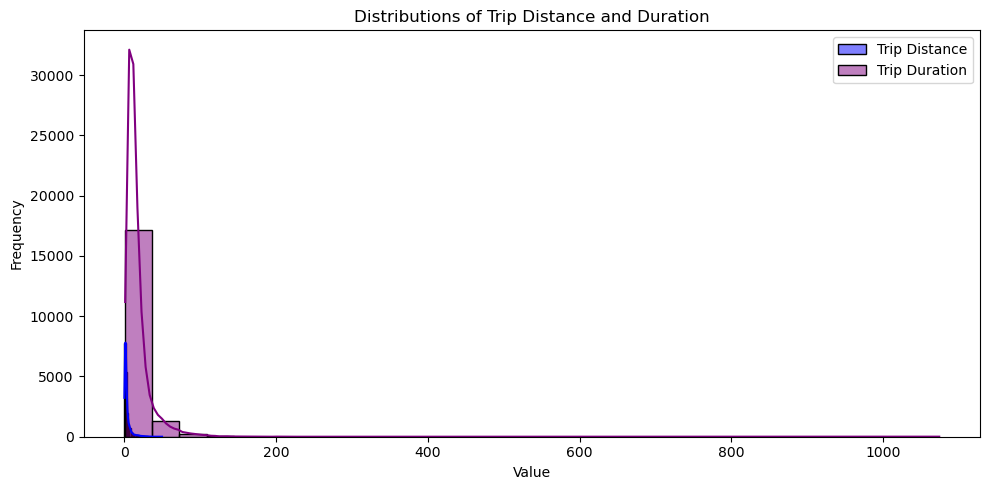

In [58]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')

df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
filtered_data = df[(df['trip_duration'] > 0) & (df['trip_duration'] <= 5000)]


plt.figure(figsize=(10, 5))
sns.histplot(filtered_data['trip_distance'], kde=True, bins=30, color='blue', label="Trip Distance")
sns.histplot(filtered_data['trip_duration'], kde=True, bins=30, color='purple', label="Trip Duration")
plt.legend()
plt.title("Distributions of Trip Distance and Duration")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## What are the busiest hours, days, or months for taxi rides?

In [65]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')

# Extract hour, day, and month
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()
df['month'] = df['lpep_pickup_datetime'].dt.month_name()


fig_hour = px.histogram(df,x="hour",title="Busiest Hours for Taxi Rides",labels={"hour": "Hour of Day"},template="plotly",
    color_discrete_sequence=["blue"],nbins=24)

fig_day = px.histogram(df,x="day_of_week",title="Busiest Days for Taxi Rides",labels={"day_of_week": "Day of the Week"},
    template="plotly",
    category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]}
)

fig_month = px.histogram(df,x="month",title="Busiest Months for Taxi Rides",labels={"month": "Month"},
    template="plotly")

fig_hour.show()
fig_day.show()
fig_month.show()

## Are there seasonal trends in total earnings or trip counts?

In [60]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')

df['month'] = df['lpep_pickup_datetime'].dt.month_name()
df['year'] = df['lpep_pickup_datetime'].dt.year

monthly_data = df.groupby(['year', 'month'], sort=False).agg(
    total_earnings=('total_amount', 'sum'),
    trip_counts=('lpep_pickup_datetime', 'count')
).reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=month_order, ordered=True)


fig_earnings = px.line(
    monthly_data.sort_values(['year', 'month']),
    x="month",
    y="total_earnings",
    color="year",
    title="Seasonal Trends in Total Earnings",
    labels={"total_earnings": "Total Earnings ($)", "month": "Month"},
    markers=True,
    template="plotly"
)

fig_trip_counts = px.line(
    monthly_data.sort_values(['year', 'month']),
    x="month",
    y="trip_counts",
    color="year",
    title="Seasonal Trends in Trip Counts",
    labels={"trip_counts": "Number of Trips", "month": "Month"},
    markers=True,
    template="plotly"
)

fig_earnings.show()
fig_trip_counts.show()

## Which pickup and dropoff locations are the most popular?

In [61]:
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup_Count']

dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Dropoff_Count']


fig_pickup = px.bar(
    pickup_counts.head(10),
    x="LocationID",
    y="Pickup_Count",
    title="Top 10 Most Popular Pickup Locations")


fig_dropoff = px.bar(
    dropoff_counts.head(10),
    x="LocationID",
    y="Dropoff_Count",
    title="Top 10 Most Popular Dropoff Locations")


fig_pickup.show()
fig_dropoff.show()

## How does the tip amount vary with total fare?

In [62]:
filtered_data = df[(df['total_amount'] > 0) & (df['tip_amount'] >= 0)]

fig_tip_vs_fare = px.scatter(filtered_data,x="total_amount",y="tip_amount",title="Tip Amount vs. Total Fare",
    labels={"total_amount": "Total Fare ($)", "tip_amount": "Tip Amount ($)"})

fig_tip_vs_fare.show()

## What is the distribution of payment types?

In [63]:
payment_type_counts = df['payment_type'].value_counts().reset_index()
payment_type_counts.columns = ['Payment_Type', 'Count']

fig_payment_distribution = px.bar(payment_type_counts,x="Payment_Type", y="Count",
    title="Distribution of Payment Types",
    labels={"Payment_Type": "Payment Type", "Count": "Number of Transactions"})

fig_payment_distribution.show()

In [67]:
df.to_csv("taxitrip-eda.csv",index=False)